In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,f1_score,average_precision_score
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
import itertools
from sklearn.impute import SimpleImputer

In [2]:
data=pd.read_csv("/home/ubuntu/Desktop/Machine Learning Projects /My Machine Learning project/CreditCardSpendPrediction-master/CREDIT CARD USERS DATA.csv")
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [3]:
data.shape

(5000, 132)

In [4]:
dictionary=pd.read_excel("/home/ubuntu/Desktop/Machine Learning Projects /My Machine Learning project/CreditCardSpendPrediction-master/CREDIT CARD USERS DATA.xlsx","Data Dictionary")

In [5]:
dictionary

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5
...,...,...,...,...,...,...
438,NaN,NaN,NaN,NaN,1,Yes
439,NaN,NaN,NaN,response_02,0,No
440,NaN,NaN,NaN,NaN,1,Yes
441,NaN,NaN,NaN,response_03,0,No


In [6]:
catvars=dictionary[dictionary['Categorical Variable'].isnull()==False]['Categorical Variable']

In [7]:
catvars

0           region
5         townsize
10          gender
12          agecat
19      birthmonth
          ...     
433         ownfax
435           news
437    response_01
439    response_02
441    response_03
Name: Categorical Variable, Length: 84, dtype: object

In [8]:
data[catvars].head(20)

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1.0,2.00,1.0,2.0,September,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5.0,5.00,0.0,2.0,May,4.0,2.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,3.0,4.00,1.0,6.0,June,2.0,2.0,0.0,16.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,2.0,2.00,0.0,3.0,July,3.0,2.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,4.0,4.00,0.0,5.0,August,4.0,3.0,0.0,22.0,5.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.0,5.00,1.0,5.0,July,2.0,1.0,0.0,10.0,3.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,4.00,1.0,4.0,October,3.0,1.0,0.0,11.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,2.0,3.00,1.0,6.0,October,2.0,1.0,0.0,15.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2.0,2.00,0.0,4.0,July,1.0,6.0,0.0,19.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for i in data.columns:
    data[i]=data[i].replace('#NULL!',np.nan)

In [10]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(115), object(17)
memory usage: 5.0+ MB


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.0014,1.421760,1.0,2.0,3.0,4.0,5.0
gender,5000.0,0.5036,0.500037,0.0,0.0,1.0,1.0,1.0
age,5000.0,47.0256,17.770338,18.0,31.0,47.0,62.0,79.0
agecat,5000.0,4.2388,1.308785,2.0,3.0,4.0,5.0,6.0
ed,5000.0,14.5430,3.281083,6.0,12.0,14.0,17.0,23.0
...,...,...,...,...,...,...,...,...
ownfax,5000.0,0.1788,0.383223,0.0,0.0,0.0,0.0,1.0
news,5000.0,0.4726,0.499299,0.0,0.0,0.0,1.0,1.0
response_01,5000.0,0.0836,0.276815,0.0,0.0,0.0,0.0,1.0
response_02,5000.0,0.1298,0.336117,0.0,0.0,0.0,0.0,1.0


In [13]:
data.isnull().sum().sort_values(ascending=False)

lnwireten      3656
lnwiremon      3656
lnequipten     3296
lnequipmon     3296
lntollten      2622
               ... 
cars              0
addresscat        0
address           0
hometype          0
response_03       0
Length: 132, dtype: int64

In [14]:
data.shape

(5000, 132)

In [15]:
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True)

In [16]:
data.shape

(5000, 126)

In [17]:
data.isnull().sum().sort_values(ascending=False)

lncardten      1422
lncardmon      1419
longten           3
lnlongten         3
cardten           2
               ... 
addresscat        0
address           0
hometype          0
homeown           0
response_03       0
Length: 126, dtype: int64

In [18]:
data[["lncardten","lncardmon"]].isnull().sum()

lncardten    1422
lncardmon    1419
dtype: int64

In [19]:
data=data.fillna(value=0)

In [20]:
data.isnull().sum().sort_values(ascending=True)

custid            0
tollten           0
tollmon           0
tollfree          0
lnlongten         0
                 ..
pets_freshfish    0
pets_saltfish     0
pets_small        0
carbuy            0
response_03       0
Length: 126, dtype: int64

In [21]:
data = data.dropna(how='any')

In [22]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2.0,2.0,0.0,68.0,6.0,January,10.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4996,4699-LEPCCE-3UD,3.0,3.0,0.0,51.0,5.0,May,14.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,8485-LLUICH-CVV,4.0,5.0,0.0,75.0,6.0,August,17.0,4.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4998,9325-URAAUT-7FA,1.0,1.0,0.0,47.0,4.0,December,19.0,4.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [23]:
data.index=data.custid
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0648-AIPJSP-UVM,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8158-SMTQFB-CNO,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [24]:
data.drop(columns={'custid'},axis=1,inplace=True)

In [25]:
data

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675-GZFGOT-QJN,2.0,2.0,0.0,68.0,6.0,January,10.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4699-LEPCCE-3UD,3.0,3.0,0.0,51.0,5.0,May,14.0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8485-LLUICH-CVV,4.0,5.0,0.0,75.0,6.0,August,17.0,4.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
reqvar=data['cardspent']+data['card2spent']
reqvar=reqvar.rename("reqvar")
data=data.join(reqvar)
data.drop(columns={'cardspent','card2spent'},inplace=True)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,77.54
5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,359.97
4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,507.83


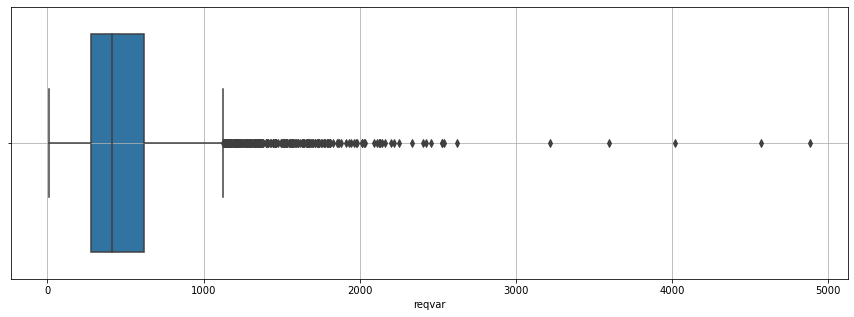

In [27]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

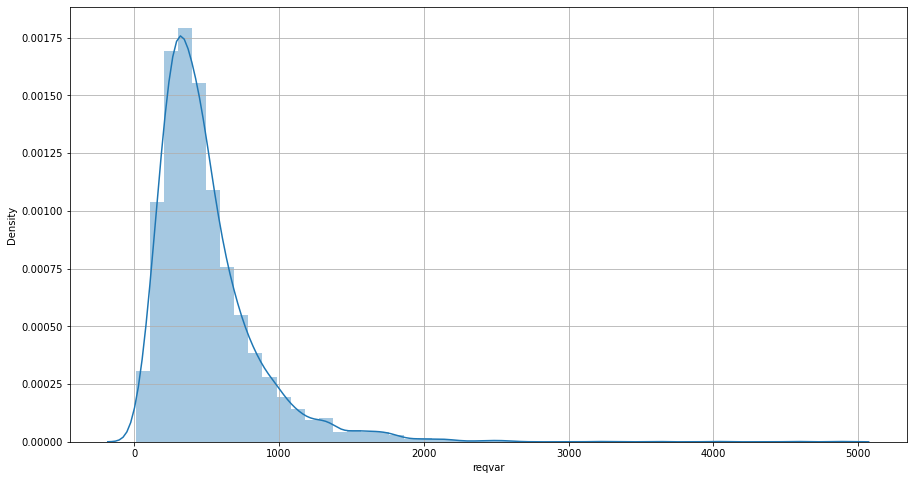

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [29]:
data['reqvar']=np.log(data['reqvar'])

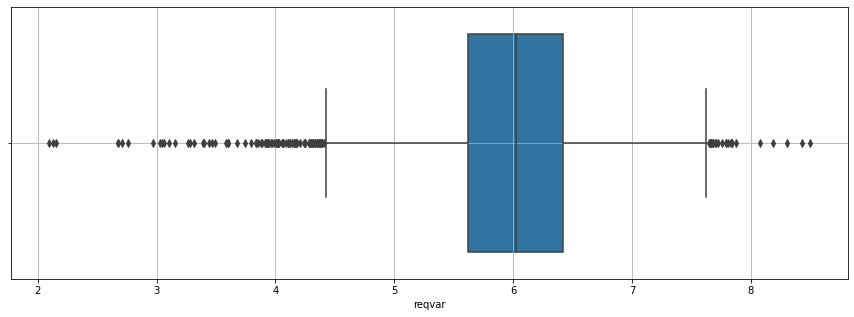

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

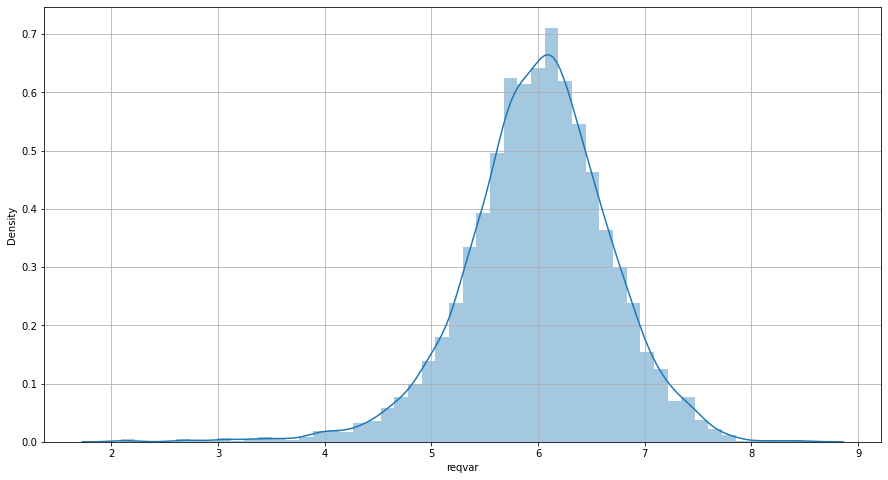

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(data['reqvar'],ax=ax)
plt.grid()
plt.show()

In [32]:
numvars=data.drop(columns=catvars,axis=1)
numvars.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,equipmon,equipten,cardmon,lncardmon,cardten,lncardten,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,15.0,31.0,3.43,11.1,1.20,0.18,2.24,0.81,-1.0,...,29.50,126.1,14.25,2.66,60.00,4.09,0.00,0.00,13.0,5.007029
0648-AIPJSP-UVM,22.0,17.0,15.0,2.71,18.6,1.22,0.20,1.57,0.45,-1.0,...,54.85,1975.0,16.00,2.77,610.00,6.41,45.65,1683.55,18.0,4.350794
5195-TLUDJE-HVO,67.0,14.0,35.0,3.56,9.9,0.93,-0.07,2.54,0.93,13.0,...,0.00,0.0,23.00,3.14,1410.00,7.25,0.00,0.00,21.0,5.886021
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,-3.78,1.12,0.11,18.0,...,0.00,0.0,21.00,3.04,685.00,6.53,0.00,0.00,26.0,5.884464
8158-SMTQFB-CNO,26.0,16.0,23.0,3.14,1.7,0.21,-1.54,0.18,-1.74,13.0,...,0.00,0.0,17.25,2.85,360.00,5.89,19.05,410.80,27.0,6.230147


In [33]:
q1=numvars.quantile(0.25)
q3=numvars.quantile(0.75)
x=q3-q1
lower=q1-(1.5*x)
upper=q3+(1.5*x)

In [34]:
nums=list()
for i in numvars.columns:
    if i in lower.index:
        nums.append(i)

In [35]:
numvars=numvars[nums]

In [36]:
df=numvars[~((numvars<(q1-1.5 *x)) | (numvars>(q3+1.5*x))).any(axis=1)]
df.head()

,age,ed,income,lninc,debtinc,creddebt,othdebt,spoused,reside,pets,...,lnlongmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten,hourstv,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,20.0,15.0,31.0,3.43,11.1,1.20,2.24,-1.0,3.0,0.0,...,1.87,29.0,161.05,29.5,126.1,14.25,0.0,0.0,13.0,5.007029
4459-VLPQUH-3OL,23.0,16.0,20.0,3.00,5.7,0.02,1.12,18.0,5.0,0.0,...,1.79,0.0,0.00,0.0,0.0,21.00,0.0,0.0,26.0,5.884464
9124-DZALHM-S6I,66.0,12.0,16.0,2.77,2.6,0.10,0.31,-1.0,1.0,1.0,...,3.05,0.0,0.00,0.0,0.0,15.50,0.0,0.0,25.0,6.148105
3512-MUWBGY-52X,47.0,11.0,84.0,4.43,4.1,1.77,1.67,-1.0,2.0,1.0,...,1.29,0.0,0.00,0.0,0.0,0.00,0.0,0.0,21.0,5.739182
8241-PWPONH-62O,33.0,8.0,19.0,2.94,0.9,0.13,0.04,9.0,5.0,6.0,...,1.28,0.0,0.00,0.0,0.0,0.00,0.0,0.0,27.0,5.974903


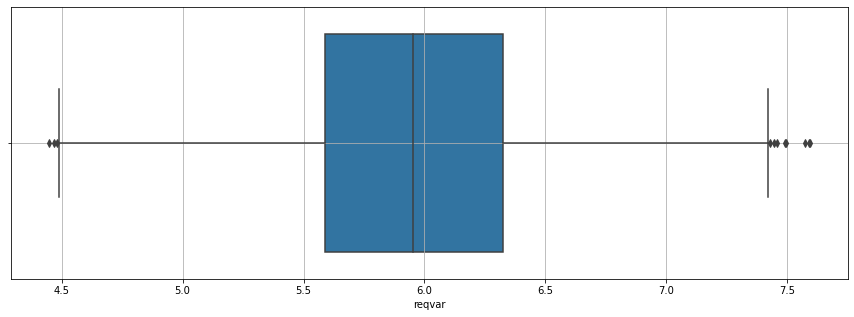

In [37]:
plt.subplots(figsize=(15,5))
sns.boxplot(df['reqvar'])
plt.grid()
plt.show()

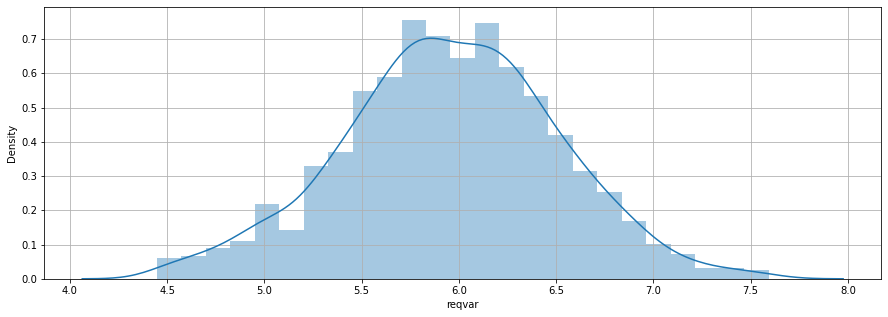

In [38]:
plt.subplots(figsize=(15,5))
sns.distplot(df['reqvar'])
plt.grid()
plt.show()

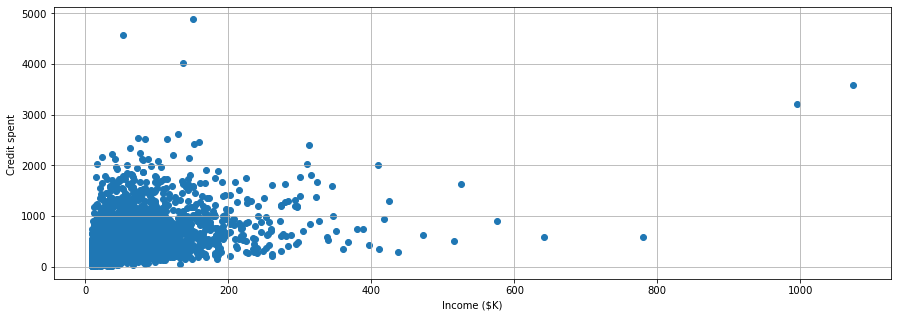

In [39]:
plt.subplots(figsize=(15,5))
plt.scatter(data['income'],reqvar)
plt.xlabel('Income ($K)')
plt.ylabel('Credit spent ')
plt.grid()
plt.show()

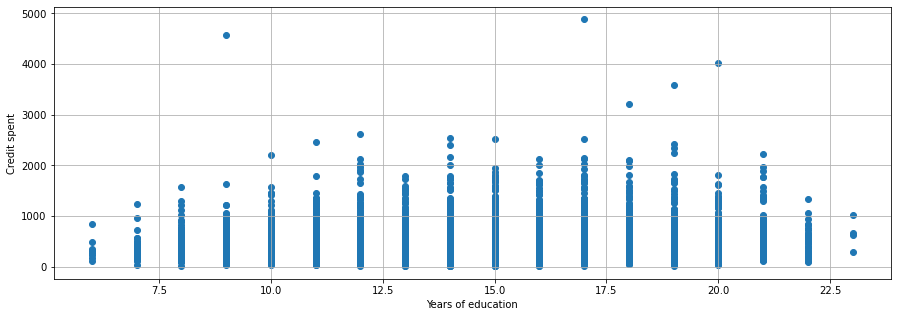

In [40]:
plt.subplots(figsize=(15,5))
plt.scatter(data['ed'],reqvar)
plt.grid()
plt.xlabel('Years of education')
plt.ylabel('Credit spent')
plt.show()

In [41]:
data['jobcat'].value_counts()

2.0    1640
1.0    1388
6.0     688
3.0     620
5.0     452
4.0     212
Name: jobcat, dtype: int64

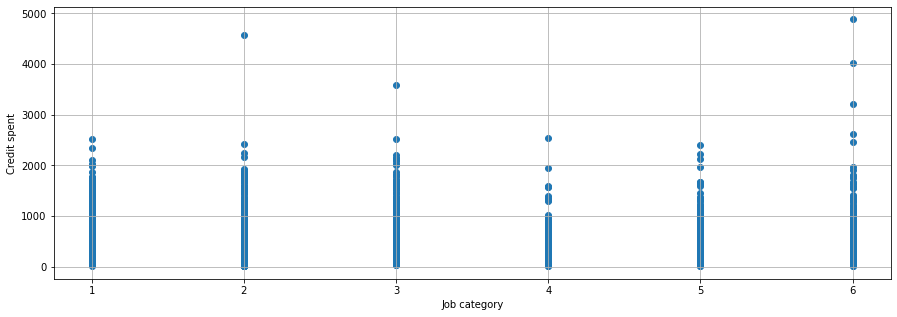

In [42]:
plt.subplots(figsize=(15,5))
plt.scatter(data['jobcat'],reqvar)
plt.xlabel('Job category')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

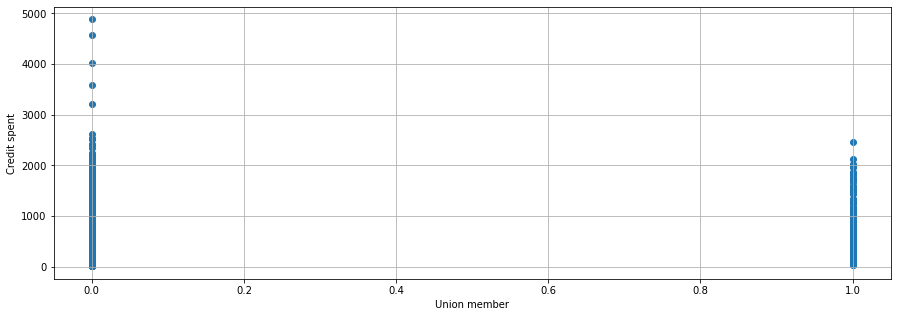

In [43]:
plt.subplots(figsize=(15,5))
plt.scatter(data['union'],reqvar)
plt.xlabel('Union member')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

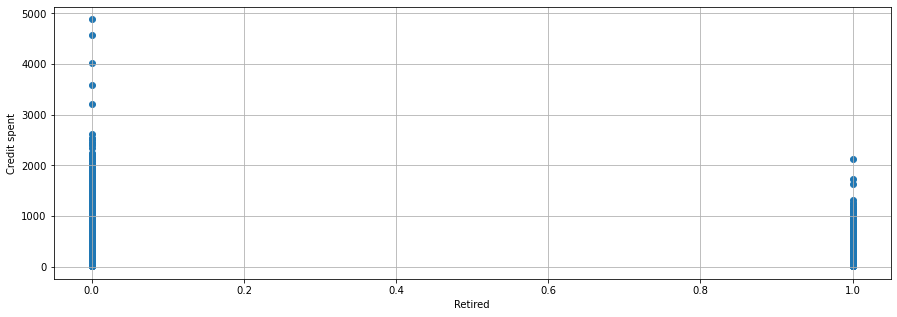

In [44]:
plt.subplots(figsize=(15,5))
plt.scatter(data['retire'],reqvar)
plt.xlabel('Retired')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

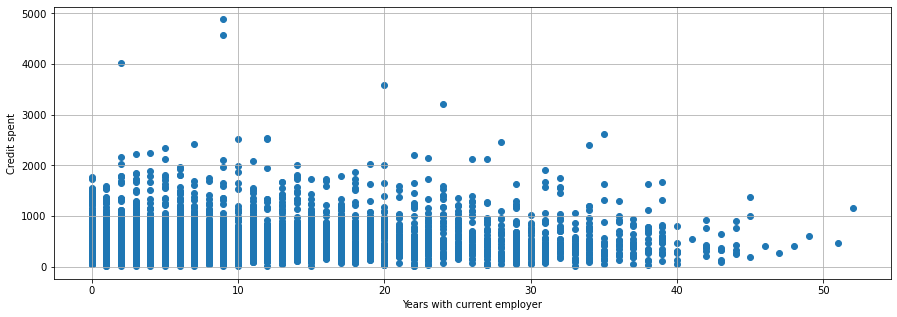

In [45]:
plt.subplots(figsize=(15,5))
plt.scatter(data['employ'],reqvar)
plt.xlabel('Years with current employer')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

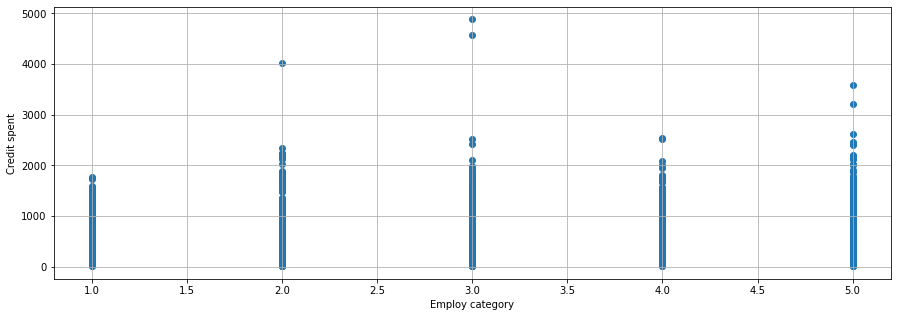

In [46]:
plt.subplots(figsize=(15,5))
plt.scatter(data['empcat'],reqvar)
plt.xlabel('Employ category')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

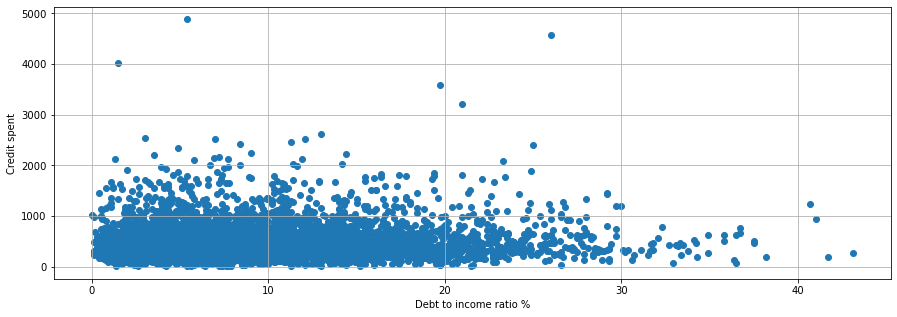

In [47]:
plt.subplots(figsize=(15,5))
plt.scatter(data['debtinc'],reqvar)
plt.xlabel('Debt to income ratio %')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

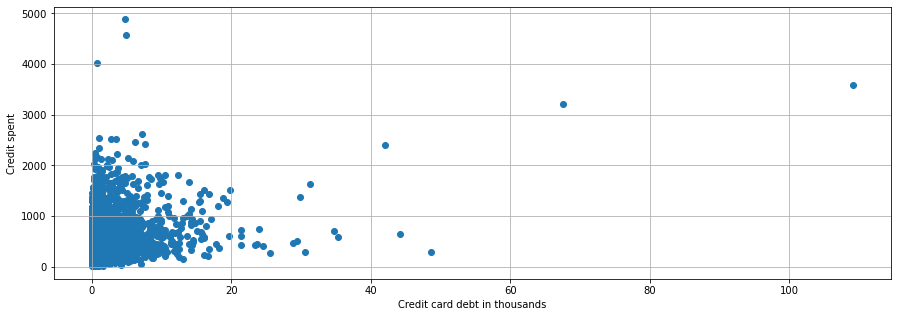

In [48]:
plt.subplots(figsize=(15,5))
plt.scatter(data['creddebt'],reqvar)
plt.xlabel('Credit card debt in thousands')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

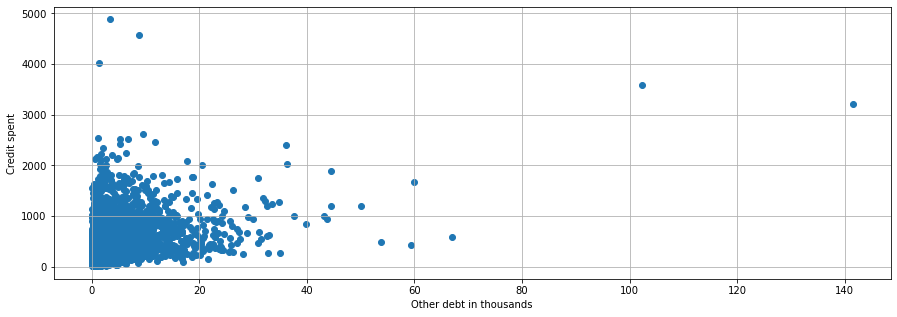

In [49]:
plt.subplots(figsize=(15,5))
plt.scatter(data['othdebt'],reqvar)
plt.xlabel('Other debt in thousands')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

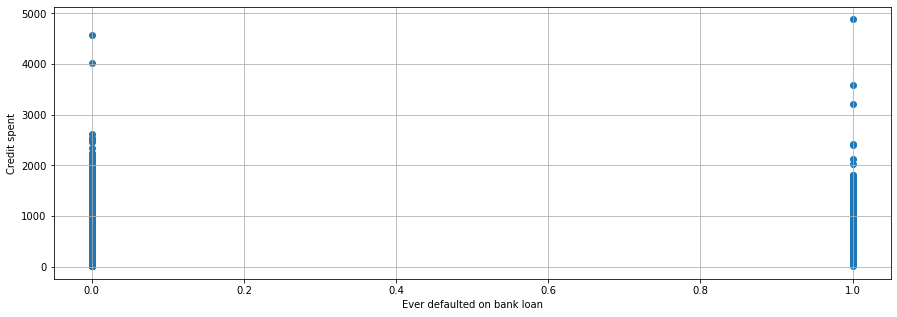

In [50]:
plt.subplots(figsize=(15,5))
plt.scatter(data['default'],reqvar)
plt.xlabel('Ever defaulted on bank loan')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

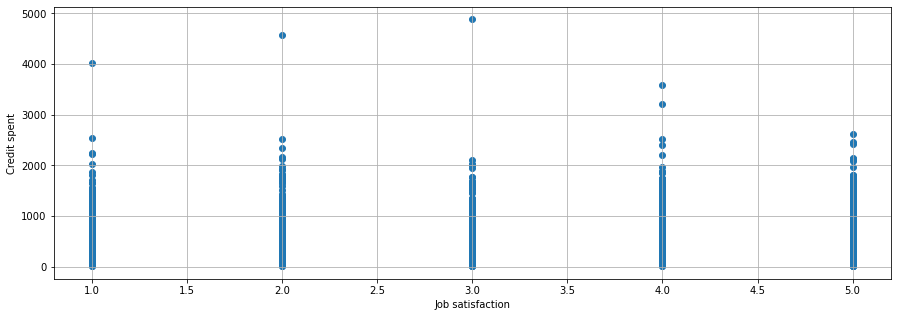

In [51]:
plt.subplots(figsize=(15,5))
plt.scatter(data['jobsat'],reqvar)
plt.xlabel('Job satisfaction')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

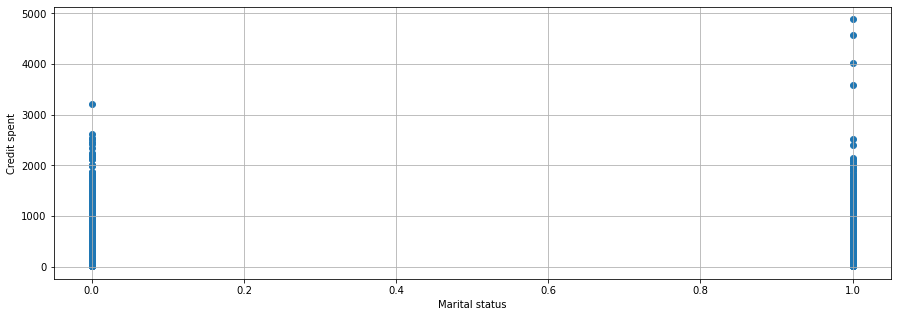

In [52]:
plt.subplots(figsize=(15,5))
plt.scatter(data['marital'],reqvar)
plt.xlabel('Marital status')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

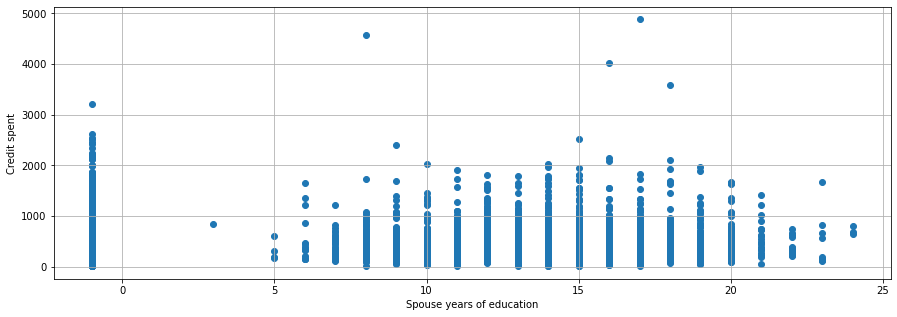

In [53]:
plt.subplots(figsize=(15,5))
plt.scatter(data['spoused'],reqvar)
plt.xlabel('Spouse years of education')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

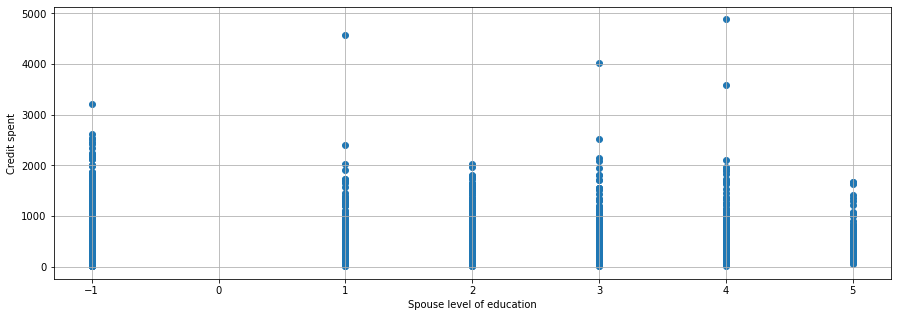

In [54]:
plt.subplots(figsize=(15,5))
plt.scatter(data['spousedcat'],reqvar)
plt.xlabel('Spouse level of education')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

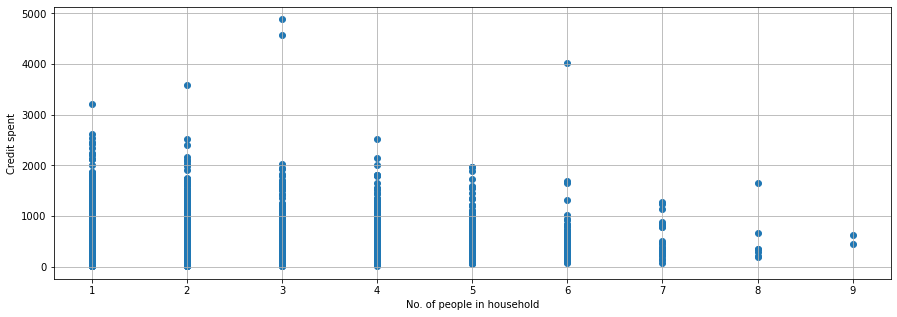

In [55]:
plt.subplots(figsize=(15,5))
plt.scatter(data['reside'],reqvar)
plt.xlabel('No. of people in household')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

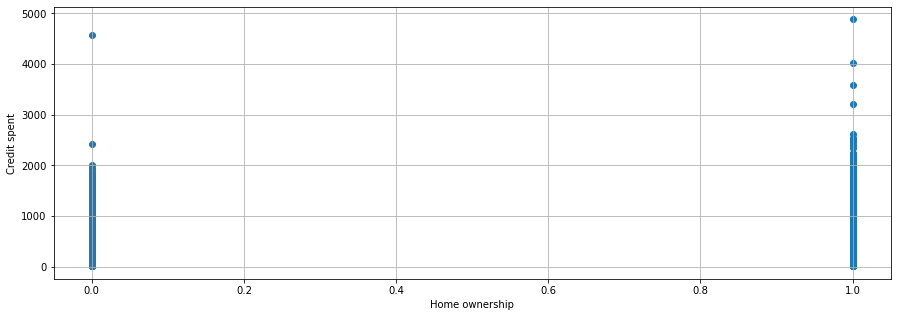

In [56]:
plt.subplots(figsize=(15,5))
plt.scatter(data['homeown'],reqvar)
plt.xlabel('Home ownership')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

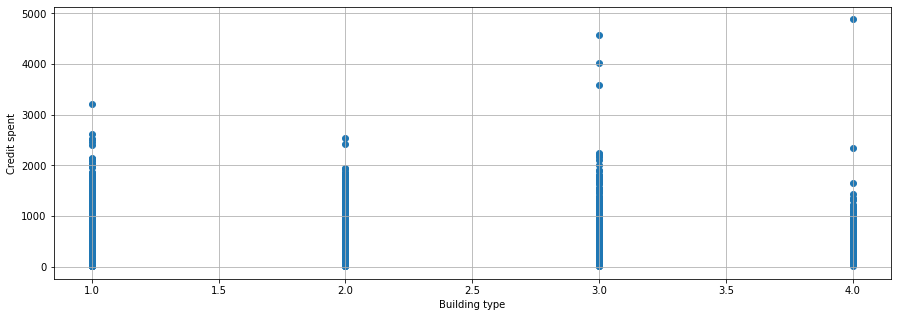

In [57]:
plt.subplots(figsize=(15,5))
plt.scatter(data['hometype'],reqvar)
plt.xlabel('Building type')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

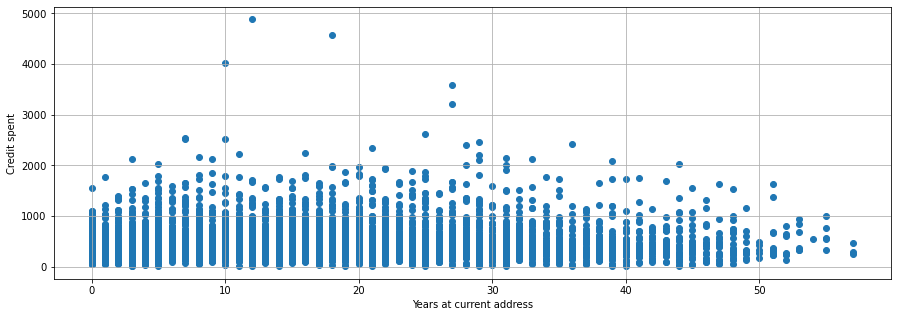

In [58]:
plt.subplots(figsize=(15,5))
plt.scatter(data['address'],reqvar)
plt.xlabel('Years at current address')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

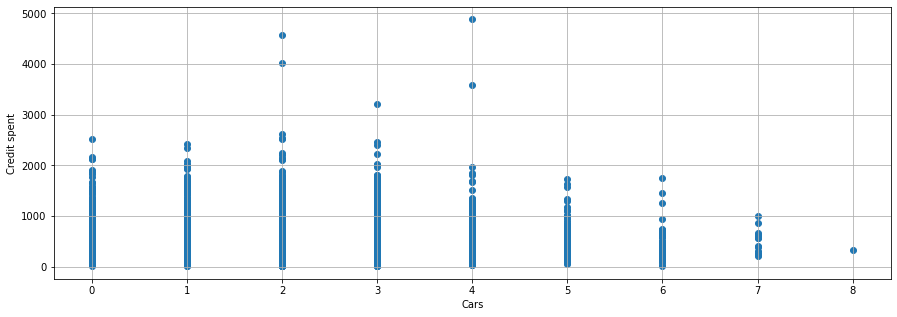

In [59]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cars'],reqvar)
plt.xlabel('Cars')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

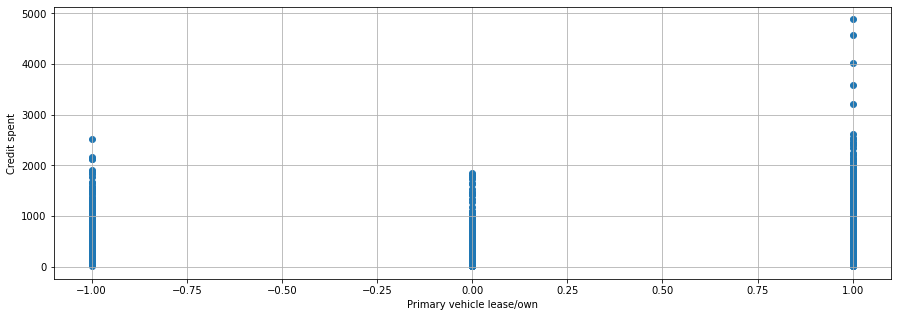

In [60]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carown'],reqvar)
plt.xlabel('Primary vehicle lease/own')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

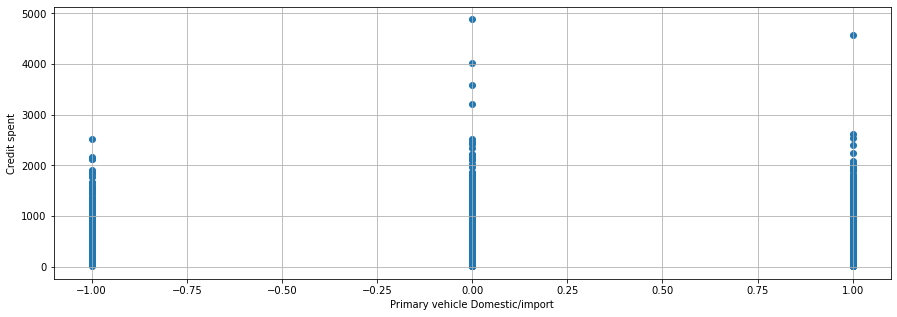

In [61]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cartype'],reqvar)
plt.xlabel('Primary vehicle Domestic/import')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

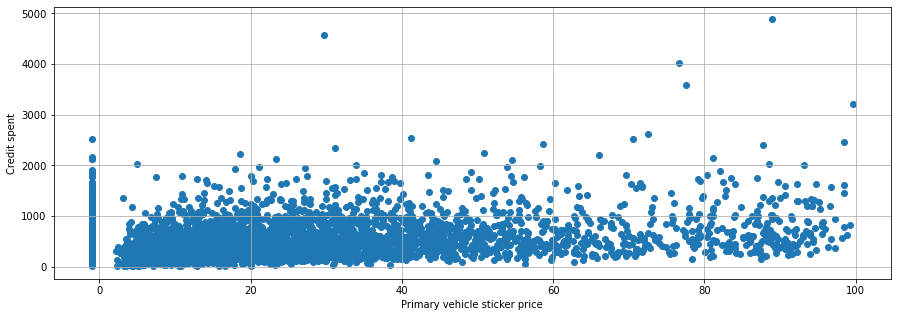

In [62]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carvalue'],reqvar)
plt.xlabel('Primary vehicle sticker price')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

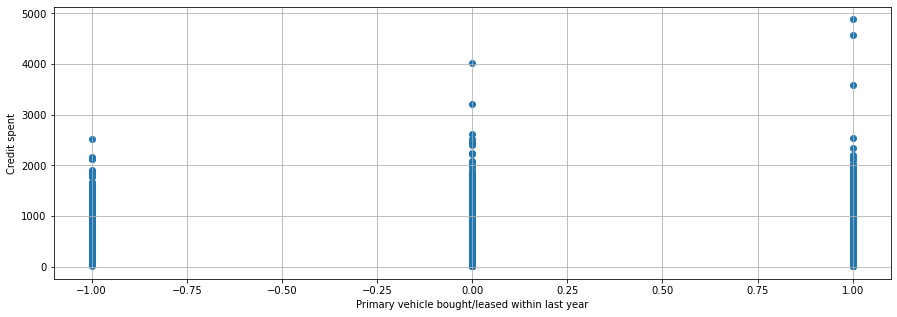

In [63]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carbought'],reqvar)
plt.xlabel('Primary vehicle bought/leased within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

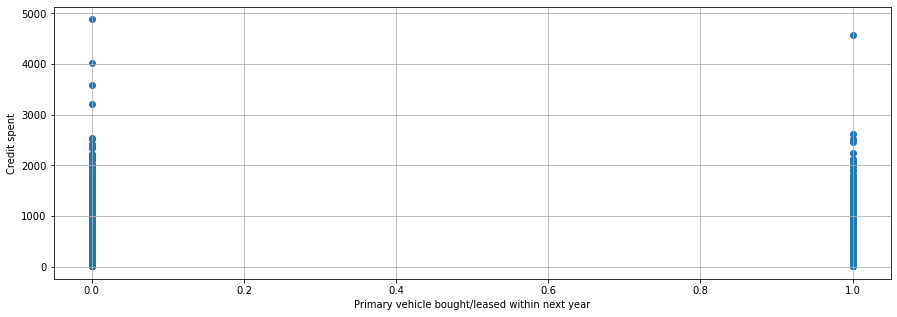

In [64]:
plt.subplots(figsize=(15,5))
plt.scatter(data['carbuy'],reqvar)
plt.xlabel('Primary vehicle bought/leased within next year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

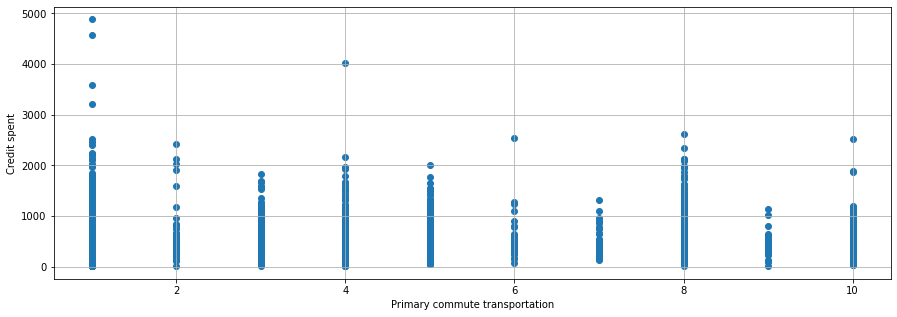

In [65]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commute'],reqvar)
plt.xlabel('Primary commute transportation')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

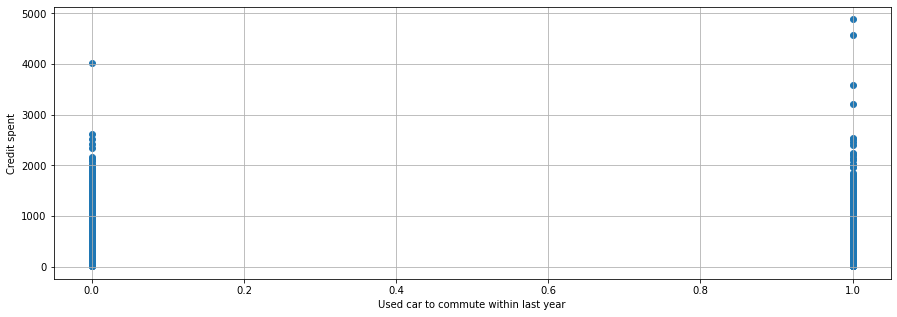

In [66]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutecar'],reqvar)
plt.xlabel('Used car to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

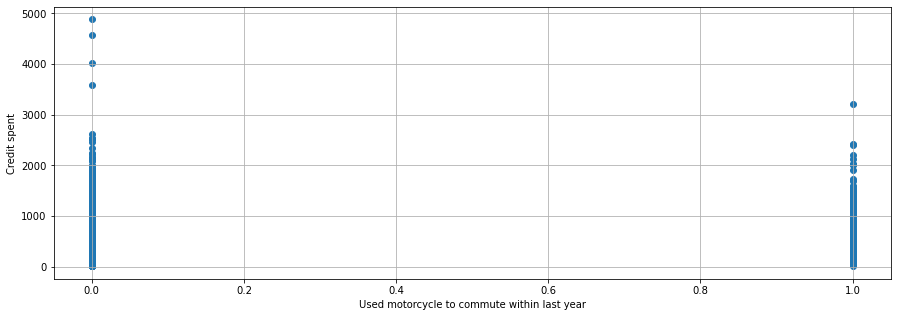

In [67]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutemotorcycle'],reqvar)
plt.xlabel('Used motorcycle to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

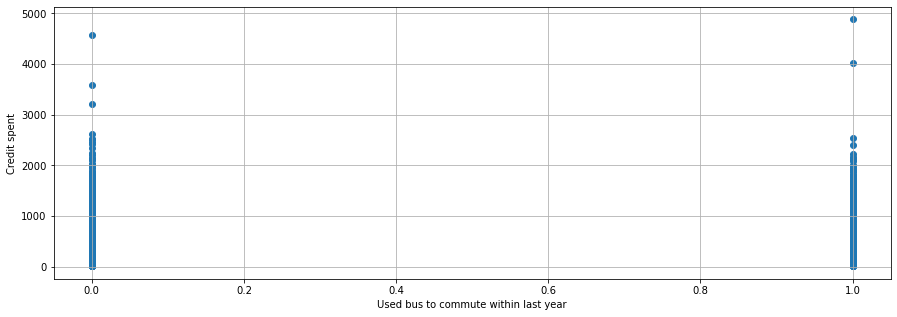

In [68]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutebus'],reqvar)
plt.xlabel('Used bus to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

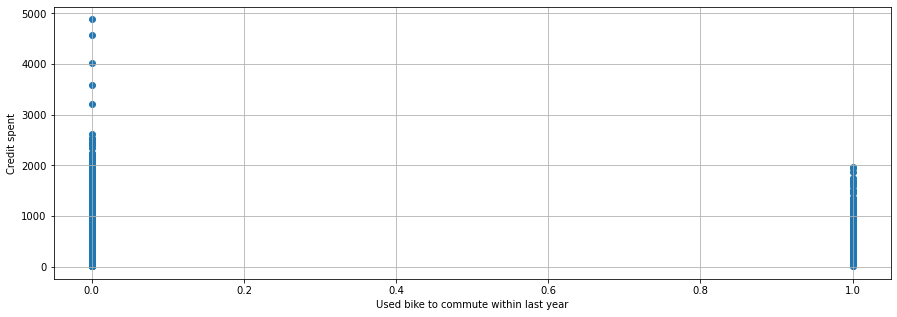

In [69]:
plt.subplots(figsize=(15,5))
plt.scatter(data['commutebike'],reqvar)
plt.xlabel('Used bike to commute within last year')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

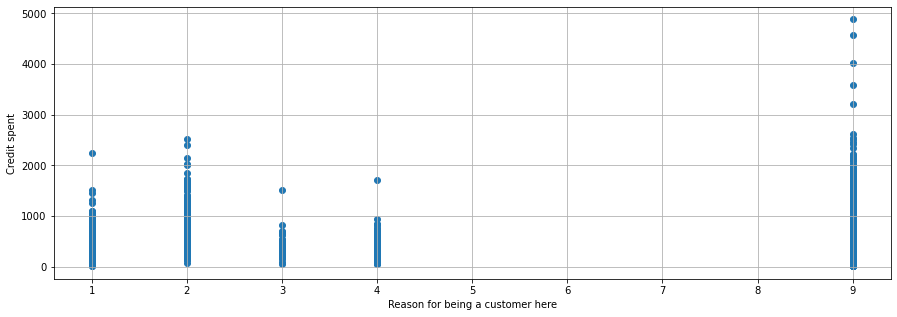

In [70]:
plt.subplots(figsize=(15,5))
plt.scatter(data['reason'],reqvar)
plt.xlabel('Reason for being a customer here')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

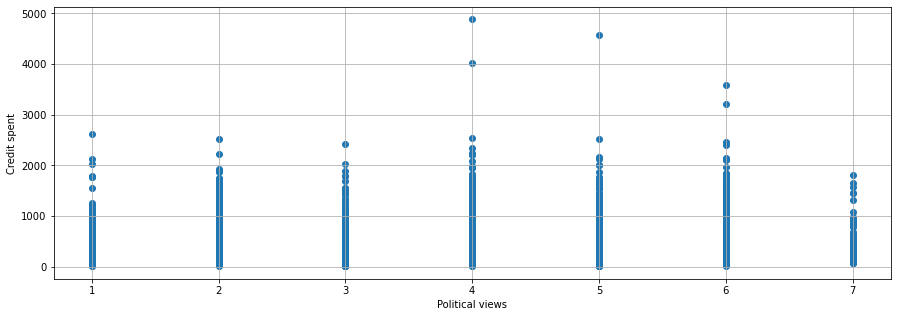

In [71]:
plt.subplots(figsize=(15,5))
plt.scatter(data['polview'],reqvar)
plt.xlabel('Political views')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

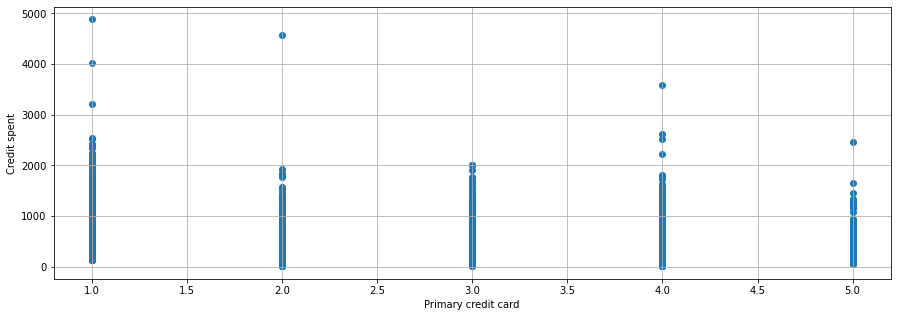

In [72]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card'],reqvar)
plt.xlabel('Primary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

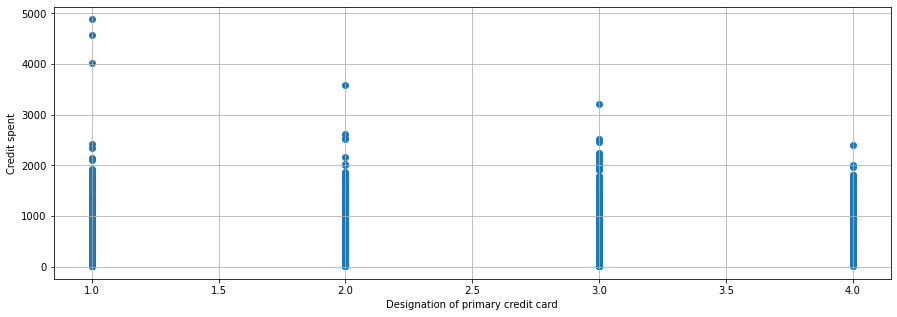

In [73]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardtype'],reqvar)
plt.xlabel('Designation of primary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

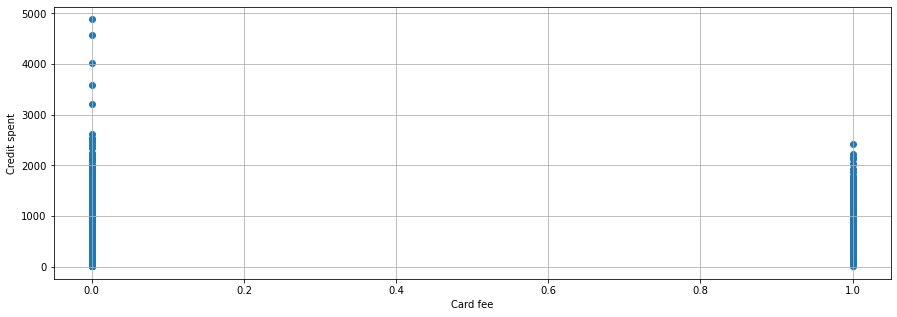

In [74]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardfee'],reqvar)
plt.xlabel('Card fee')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

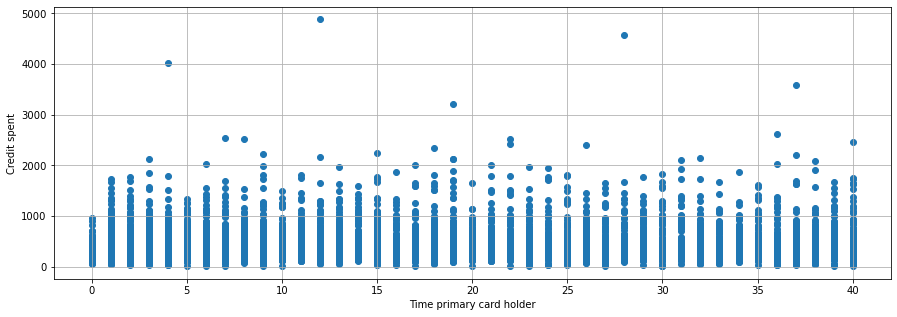

In [75]:
plt.subplots(figsize=(15,5))
plt.scatter(data['cardtenure'],reqvar)
plt.xlabel('Time primary card holder')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

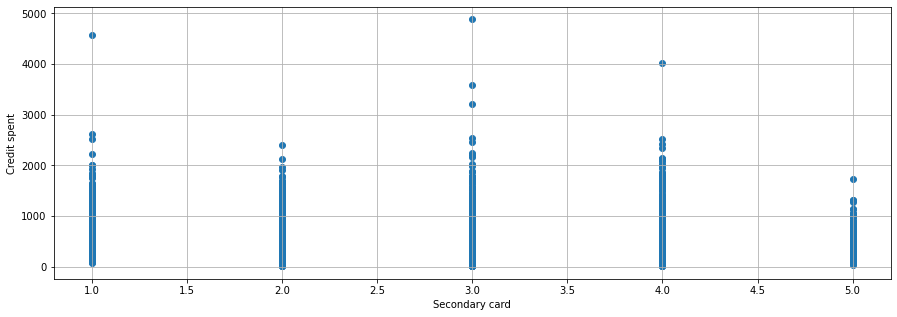

In [76]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2'],reqvar)
plt.xlabel('Secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

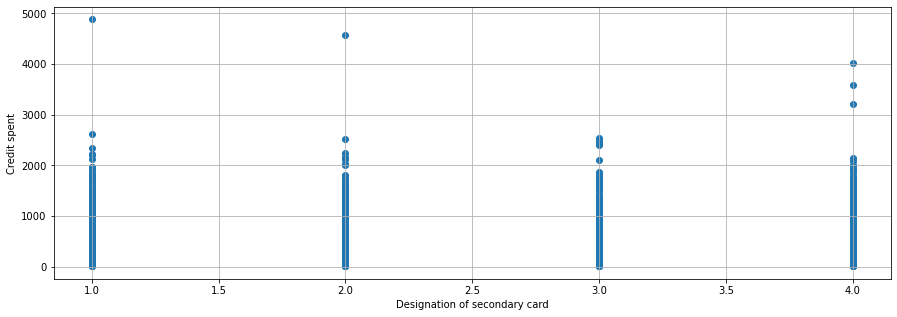

In [77]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2type'],reqvar)
plt.xlabel('Designation of secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

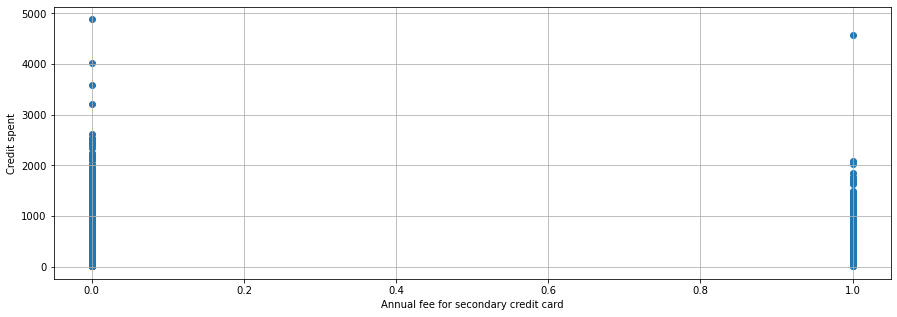

In [78]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2fee'],reqvar)
plt.xlabel('Annual fee for secondary credit card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

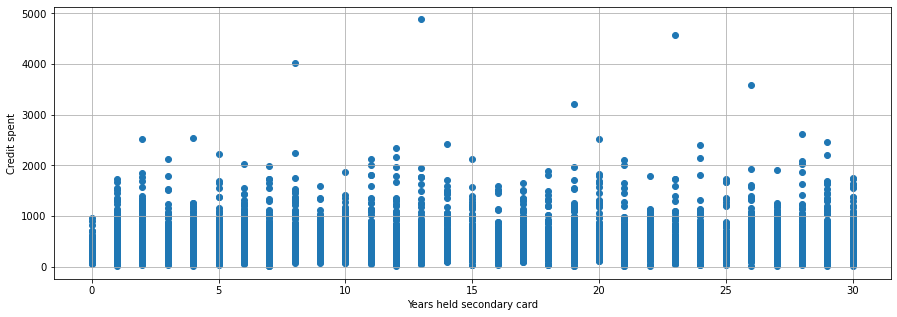

In [79]:
plt.subplots(figsize=(15,5))
plt.scatter(data['card2tenure'],reqvar)
plt.xlabel('Years held secondary card')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

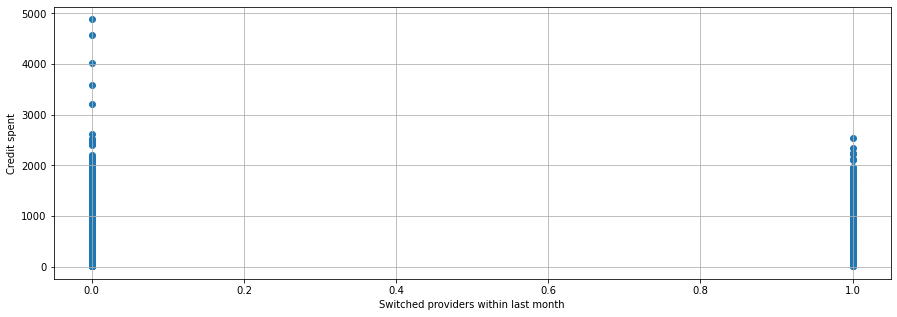

In [80]:
plt.subplots(figsize=(15,5))
plt.scatter(data['churn'],reqvar)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

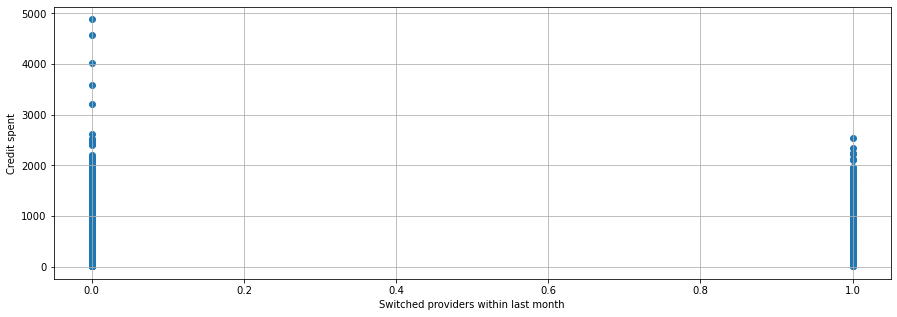

In [81]:
plt.subplots(figsize=(15,5))
plt.scatter(data['churn'],reqvar)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

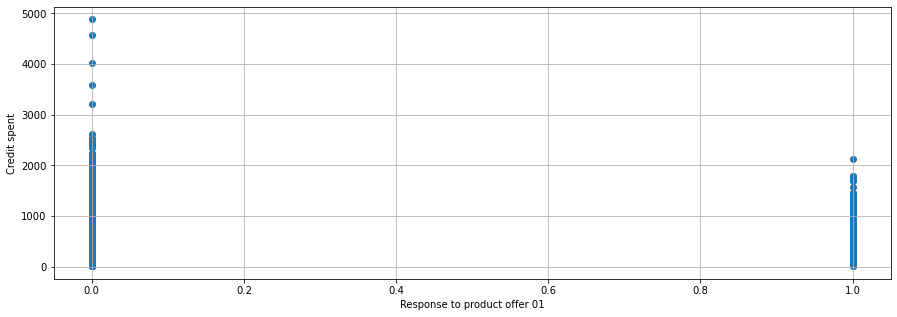

In [82]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_01'],reqvar)
plt.xlabel('Response to product offer 01')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

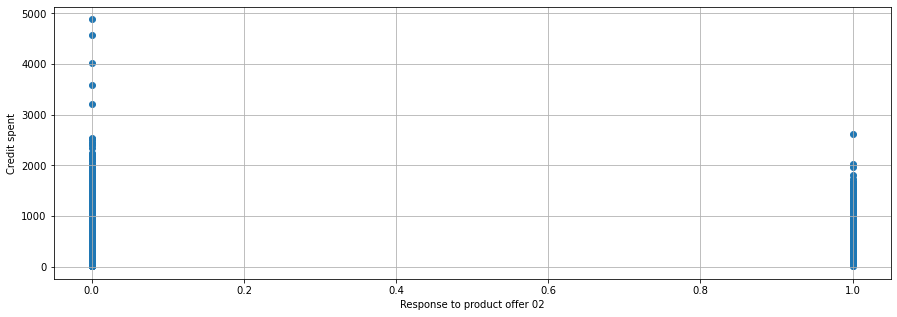

In [83]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_02'],reqvar)
plt.xlabel('Response to product offer 02')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

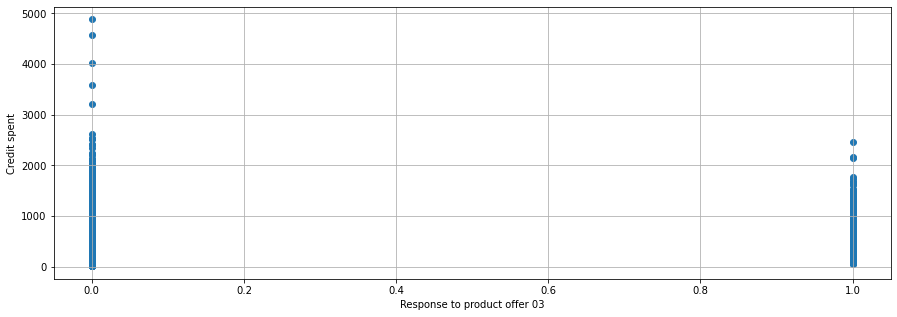

In [84]:
plt.subplots(figsize=(15,5))
plt.scatter(data['response_03'],reqvar)
plt.xlabel('Response to product offer 03')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

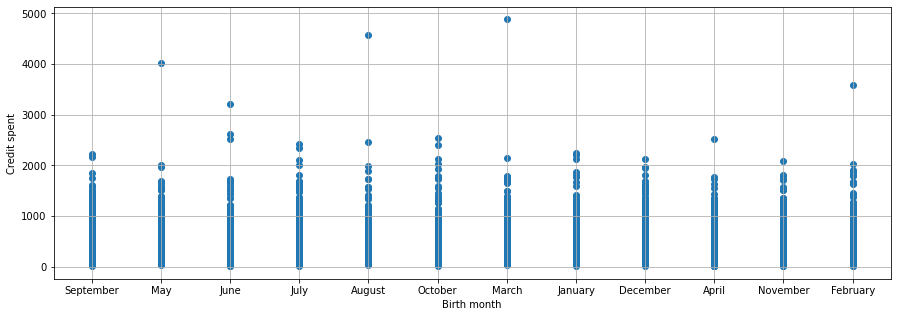

In [85]:
plt.subplots(figsize=(15,5))
plt.scatter(data['birthmonth'],reqvar)
plt.xlabel('Birth month')
plt.ylabel('Credit spent')
plt.grid()
plt.show()

In [86]:
q1=numvars.quantile(0.10)
numvars[numvars[q1.index]<q1].describe().T

,count,mean,std,min,25%,50%,75%,max
age,441.0,19.929705,1.448213,18.000000,19.000000,20.000000,21.000000,22.000000
ed,324.0,8.404321,0.762987,6.000000,8.000000,9.000000,9.000000,9.000000
income,462.0,12.095238,2.155460,9.000000,10.000000,12.000000,14.000000,15.000000
lninc,462.0,2.476190,0.182914,2.200000,2.300000,2.480000,2.640000,2.710000
debtinc,480.0,1.734167,0.693091,0.000000,1.200000,1.900000,2.300000,2.700000
creddebt,498.0,0.097149,0.046385,0.000000,0.060000,0.100000,0.140000,0.170000
othdebt,499.0,0.275892,0.111500,0.000000,0.200000,0.290000,0.370000,0.450000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
q2=numvars.quantile(0.25)
numvars[numvars[q2.index]<q2].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1159.0,23.986195,3.755914,18.000000,21.000000,24.000000,27.0000,30.000000
ed,946.0,9.836152,1.195053,6.000000,9.000000,10.000000,11.0000,11.000000
income,1231.0,16.789602,4.277233,9.000000,14.000000,17.000000,20.0000,23.000000
lninc,1231.0,2.783607,0.280032,2.200000,2.640000,2.830000,3.0000,3.140000
debtinc,1215.0,3.073416,1.276312,0.000000,2.100000,3.200000,4.2000,5.000000
creddebt,1247.0,0.205894,0.105167,0.000000,0.120000,0.210000,0.2900,0.380000
othdebt,1242.0,0.545531,0.259261,0.000000,0.330000,0.550000,0.7700,0.970000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pets,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
q3=numvars.quantile(0.50)
numvars[numvars[q3.index]<q3].describe().T

,count,mean,std,min,25%,50%,75%,max
age,2490.0,31.561847,8.245699,18.000000,25.000000,31.000000,38.000000,46.000000
ed,1944.0,11.220165,1.624530,6.000000,10.000000,12.000000,13.000000,13.000000
income,2451.0,23.434109,7.837537,9.000000,17.000000,23.000000,30.000000,37.000000
lninc,2451.0,3.089633,0.377445,2.200000,2.830000,3.140000,3.400000,3.610000
debtinc,2496.0,5.008574,2.216742,0.000000,3.200000,5.100000,6.900000,8.700000
creddebt,2498.0,0.423415,0.254734,0.000000,0.210000,0.390000,0.630000,0.920000
othdebt,2499.0,1.018547,0.552091,0.000000,0.560000,0.980000,1.460000,2.090000
spoused,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reside,2035.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
pets,2309.0,0.337809,0.473065,0.000000,0.000000,0.000000,1.000000,1.000000


In [89]:
q4=numvars.quantile(0.75)
numvars[numvars[q4.index]<q4].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3695.0,38.853045,12.717849,18.000000,28.000000,38.000000,50.00000,61.000000
ed,3535.0,12.897878,2.277826,6.000000,11.000000,13.000000,15.00000,16.000000
income,3748.0,32.637673,14.960101,9.000000,21.000000,30.000000,43.00000,66.000000
lninc,3748.0,3.369682,0.500700,2.200000,3.040000,3.400000,3.76000,4.190000
debtinc,3745.0,6.984326,3.414614,0.000000,4.200000,6.900000,9.80000,13.500000
creddebt,3747.0,0.747507,0.536043,0.000000,0.300000,0.630000,1.11500,2.050000
othdebt,3748.0,1.692076,1.111702,0.000000,0.770000,1.460000,2.51000,4.300000
spoused,3727.0,2.626778,5.594498,-1.000000,-1.000000,-1.000000,9.00000,13.000000
reside,3502.0,1.418903,0.493450,1.000000,1.000000,1.000000,2.00000,2.000000
pets,3555.0,1.185935,1.304951,0.000000,0.000000,1.000000,2.00000,4.000000


In [90]:
catvars=data[catvars].join(reqvar)
catvars=catvars.loc[df.index]
catvars.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,reqvar
custid,,,,,,,,,,,,,,,,,,,,,
3964-QJWTRG-NPN,1.0,2.00,1.0,2.0,September,3.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,149.46
4459-VLPQUH-3OL,4.0,3.00,0.0,2.0,May,3.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,359.41
9124-DZALHM-S6I,2.0,3.00,1.0,6.0,October,2.0,1.0,0.0,15.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,467.83
3512-MUWBGY-52X,2.0,2.00,0.0,4.0,July,1.0,6.0,0.0,19.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310.81
8241-PWPONH-62O,2.0,4.00,1.0,3.0,October,1.0,2.0,0.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,393.43


In [91]:
final_cat=list()
for i in catvars:
    if type(catvars[i][0])!=str:
        f=stats.f_oneway(catvars[i],catvars.reqvar)
        if f.pvalue<=0.05:
            final_cat.append(i)

In [92]:
final_num=list()
for i in df.columns:
    if i!='reqvar':
        f=stats.pearsonr(df[i],df.reqvar)
        if f[1]<=0.05:
            final_num.append(i)

In [93]:
final_num

['ed',
 'income',
 'lninc',
 'creddebt',
 'othdebt',
 'carvalue',
 'carditems',
 'card2items',
 'tollten']

In [94]:
df=pd.DataFrame(df[final_num])
final_df=df.join(catvars[final_cat])

In [95]:
#Modeling
x_train, x_test, y_train, y_test= train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [97]:
model = xgboost.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

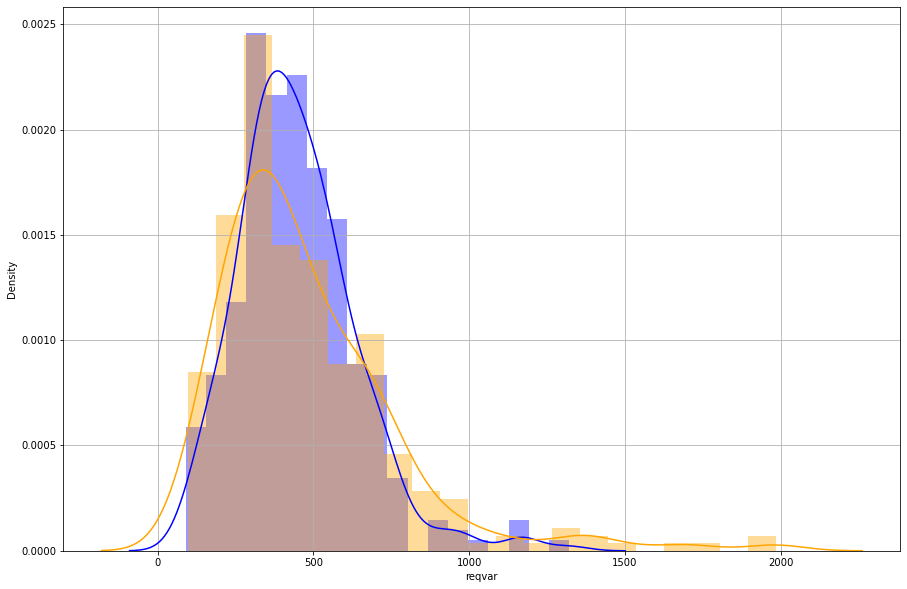

In [98]:
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()

In [99]:
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                importance
card              0.114051
card2items        0.099355
carditems         0.078899
multline          0.043195
confer            0.037442
...                    ...
card2tenurecat    0.000000
owntv             0.000000
edcat             0.000000
inccat            0.000000
tollfree          0.000000

[91 rows x 1 columns]


In [100]:
#According to the mentioned importance, we can reduce the number of features to make the model better. Here, we remove features that have no or very little impact with regard to the model.

In [101]:
final_df=final_df[["carditems","income","card2items","othdebt","creddebt","card","carvalue","ed","cardtenure","card2","reason","address","employ","card2tenure","card2type","commute","hometype","internet","multline"]]

In [102]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(final_df,catvars["reqvar"],test_size=0.2,random_state=0)

In [103]:
model=xgboost.XGBRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

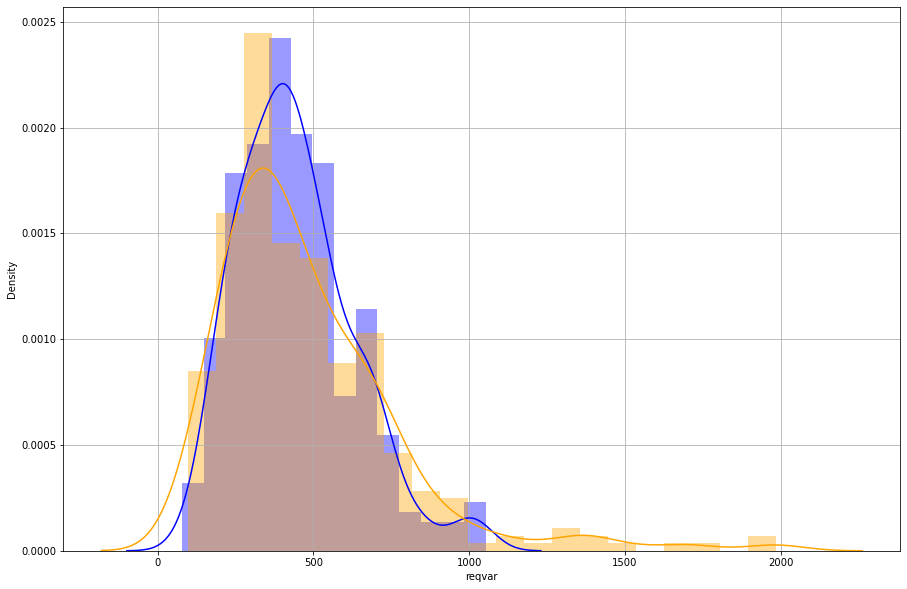

In [104]:
y_pred=model.predict(x_test)
plt.figure(figsize=(15,10))
sns.distplot(y_pred,color="Blue")
sns.distplot(y_test,color="Orange")
plt.grid()
plt.show()